In [1]:
import numpy as np
import pandas as pd
import sklearn.impute , sklearn.preprocessing
import seaborn 
import matplotlib.pyplot as plt

# Instructions

- Read training, test, and live data from CSV files
- Then, identify which columns are numerical and which columns are categorical
    - Note that some features that appear numeric might actually be categorical
- Assess whether the data is balance or imbalance

In [2]:
data_train = pd.read_csv('./data/high_salary_train.csv').set_index('id')
data_train

,social-security-number,house-number,age-group,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country-code,native-country,label
id,,,,,,,,,,,,,,,,,,
8548,369695496.0,8982.0,3.0,private,176239.0,9th,5.0,divorced,other-service,not-in-family,white,female,0.0,0.0,2.0,USA,united-states,0.0
25685,252071921.0,6574.0,1.0,private,272338.0,assoc-voc,11.0,divorced,prof-specialty,unmarried,white,female,0.0,0.0,2.0,USA,united-states,0.0
21888,891531473.0,5771.0,4.0,local-gov,115763.0,masters,14.0,married-civ-spouse,prof-specialty,wife,white,female,0.0,0.0,2.0,USA,united-states,1.0
15391,840598980.0,4932.0,2.0,private,191196.0,some-college,10.0,married-civ-spouse,prof-specialty,husband,white,male,0.0,0.0,1.0,USA,united-states,1.0
24388,666146271.0,541.0,0.0,NaN,34862.0,some-college,10.0,never-married,NaN,own-child,amer-indian-eskimo,male,0.0,0.0,4.0,USA,united-states,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8695,181655516.0,361.0,0.0,private,42706.0,some-college,10.0,never-married,prof-specialty,not-in-family,white,male,0.0,0.0,2.0,USA,united-states,0.0
2192,796404433.0,950.0,2.0,local-gov,103759.0,some-college,10.0,married-civ-spouse,transport-moving,husband,white,male,2.0,0.0,2.0,USA,united-states,0.0
8250,622635909.0,8689.0,0.0,private,316184.0,hs-grad,9.0,never-married,other-service,other-relative,black,male,0.0,0.0,2.0,USA,united-states,0.0


In [3]:
data_test = pd.read_csv('./data/high_salary_test.csv').set_index('id')
data_test

,social-security-number,house-number,age-group,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country-code,native-country,label
id,,,,,,,,,,,,,,,,,,
12849,335086368.0,4170.0,1.0,private,509500.0,bachelors,13.0,never-married,tech-support,not-in-family,white,female,2.0,0.0,2.0,USA,united-states,1.0
1460,732733728.0,5442.0,0.0,private,243368.0,preschool,1.0,never-married,farming-fishing,not-in-family,white,male,0.0,0.0,3.0,MEX,mexico,0.0
13594,807579036.0,7659.0,2.0,private,144524.0,hs-grad,9.0,divorced,machine-op-inspct,unmarried,black,female,0.0,0.0,2.0,USA,united-states,0.0
14400,201637967.0,4318.0,3.0,private,150975.0,hs-grad,9.0,divorced,machine-op-inspct,not-in-family,amer-indian-eskimo,female,NaN,0.0,2.0,USA,united-states,0.0
14333,758267678.0,8392.0,2.0,private,136419.0,hs-grad,9.0,married-civ-spouse,craft-repair,husband,white,male,0.0,0.0,3.0,USA,united-states,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4866,311416416.0,7608.0,1.0,private,108293.0,some-college,10.0,never-married,adm-clerical,own-child,white,female,0.0,4.0,2.0,USA,united-states,0.0
16084,952216349.0,7574.0,3.0,private,277471.0,assoc-voc,11.0,married-civ-spouse,tech-support,husband,white,male,0.0,0.0,2.0,USA,united-states,1.0
11554,620137737.0,1156.0,3.0,private,146268.0,some-college,10.0,married-civ-spouse,craft-repair,husband,white,male,0.0,0.0,2.0,USA,united-states,0.0


In [4]:
data_live = pd.read_csv('./data/high_salary.live.csv').set_index('id')
data_live

,social-security-number,house-number,age-group,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country-code,native-country
id,,,,,,,,,,,,,,,,,
6111,565712576.0,9337.0,0.0,private,287357.0,11th,7.0,married-civ-spouse,protective-serv,husband,white,male,0.0,0.0,2.0,USA,united-states
11214,329599477.0,6457.0,1.0,private,167558.0,hs-grad,9.0,never-married,sales,unmarried,white,female,0.0,0.0,1.0,MEX,mexico
5554,222432362.0,189.0,4.0,private,27385.0,hs-grad,9.0,married-civ-spouse,exec-managerial,husband,white,male,0.0,0.0,3.0,USA,united-states
25131,209882990.0,2048.0,2.0,local-gov,153976.0,masters,14.0,married-civ-spouse,prof-specialty,husband,white,male,0.0,0.0,2.0,USA,united-states
14324,936607310.0,8185.0,3.0,private,20956.0,hs-grad,9.0,married-civ-spouse,craft-repair,husband,white,male,0.0,0.0,2.0,USA,united-states
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25998,331613078.0,6349.0,4.0,private,117898.0,bachelors,13.0,married-civ-spouse,exec-managerial,husband,white,male,0.0,0.0,3.0,USA,united-states
8375,353499588.0,5768.0,4.0,private,298546.0,hs-grad,9.0,married-civ-spouse,farming-fishing,husband,white,male,0.0,0.0,4.0,USA,united-states
13888,604365500.0,6286.0,1.0,private,36340.0,11th,7.0,divorced,other-service,unmarried,white,female,0.0,0.0,1.0,USA,united-states


# Check Missing Value

In [5]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14629 entries, 8548 to 16074
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   social-security-number  14619 non-null  float64
 1   house-number            14613 non-null  float64
 2   age-group               14623 non-null  float64
 3   workclass               13897 non-null  object 
 4   fnlwgt                  14613 non-null  float64
 5   education               14615 non-null  object 
 6   education-num           14617 non-null  float64
 7   marital-status          14609 non-null  object 
 8   occupation              13899 non-null  object 
 9   relationship            14615 non-null  object 
 10  race                    14616 non-null  object 
 11  sex                     14615 non-null  object 
 12  capitalgain             14613 non-null  float64
 13  capitalloss             14615 non-null  float64
 14  hoursperweek            14611 non-null  

In [6]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6271 entries, 12849 to 10101
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   social-security-number  6267 non-null   float64
 1   house-number            6260 non-null   float64
 2   age-group               6264 non-null   float64
 3   workclass               5946 non-null   object 
 4   fnlwgt                  6264 non-null   float64
 5   education               6265 non-null   object 
 6   education-num           6269 non-null   float64
 7   marital-status          6268 non-null   object 
 8   occupation              5947 non-null   object 
 9   relationship            6264 non-null   object 
 10  race                    6262 non-null   object 
 11  sex                     6263 non-null   object 
 12  capitalgain             6264 non-null   float64
 13  capitalloss             6264 non-null   float64
 14  hoursperweek            6268 non-null   

In [7]:
data_live.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6967 entries, 6111 to 9658
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   social-security-number  6965 non-null   float64
 1   house-number            6958 non-null   float64
 2   age-group               6954 non-null   float64
 3   workclass               6622 non-null   object 
 4   fnlwgt                  6963 non-null   float64
 5   education               6960 non-null   object 
 6   education-num           6959 non-null   float64
 7   marital-status          6958 non-null   object 
 8   occupation              6620 non-null   object 
 9   relationship            6954 non-null   object 
 10  race                    6960 non-null   object 
 11  sex                     6960 non-null   object 
 12  capitalgain             6959 non-null   float64
 13  capitalloss             6957 non-null   float64
 14  hoursperweek            6954 non-null   fl

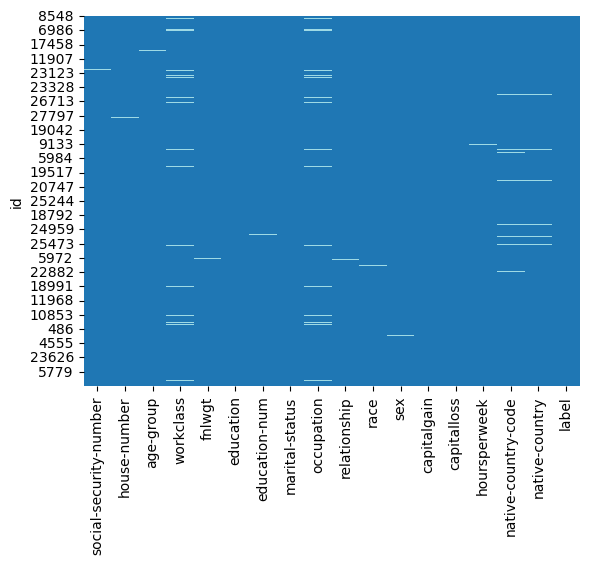

In [8]:
seaborn.heatmap(data_train.isnull(),cbar=False,cmap='tab20')
plt.show()

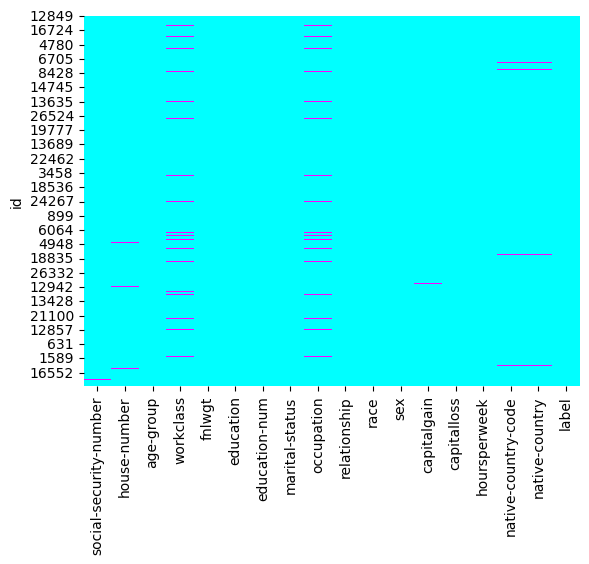

In [9]:
seaborn.heatmap(data_test.isnull(),cbar=False,cmap='cool')
plt.show()

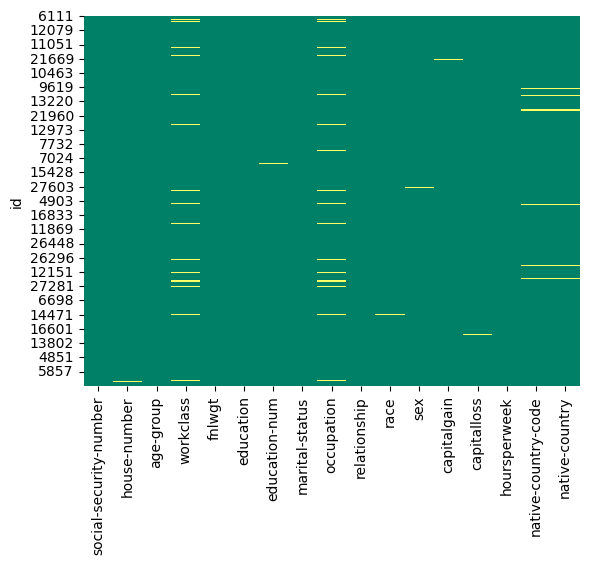

In [10]:
seaborn.heatmap(data_live.isnull(),cbar=False,cmap='summer')
plt.show()

In [11]:
data_train.isnull().sum()

social-security-number     10
house-number               16
age-group                   6
workclass                 732
fnlwgt                     16
education                  14
education-num              12
marital-status             20
occupation                730
relationship               14
race                       13
sex                        14
capitalgain                16
capitalloss                14
hoursperweek               18
native-country-code       280
native-country            281
label                       0
dtype: int64

In [12]:
data_test.isnull().sum()

social-security-number      4
house-number               11
age-group                   7
workclass                 325
fnlwgt                      7
education                   6
education-num               2
marital-status              3
occupation                324
relationship                7
race                        9
sex                         8
capitalgain                 7
capitalloss                 7
hoursperweek                3
native-country-code       119
native-country            117
label                       0
dtype: int64

In [13]:
data_live.isnull().sum()

social-security-number      2
house-number                9
age-group                  13
workclass                 345
fnlwgt                      4
education                   7
education-num               8
marital-status              9
occupation                347
relationship               13
race                        7
sex                         7
capitalgain                 8
capitalloss                10
hoursperweek               13
native-country-code       122
native-country            123
dtype: int64

In [14]:
data_train['label'].value_counts()

label
0.0    8477
1.0    6152
Name: count, dtype: int64

In [15]:
data_test['label'].value_counts()

label
0.0    3658
1.0    2613
Name: count, dtype: int64

In [16]:
from sklearn.impute import SimpleImputer

In [17]:
categorical_features_train = data_train.select_dtypes(include=['object', 'category']).columns
categorical_features_train

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country-code', 'native-country'],
      dtype='object')

In [18]:
categorical_features_test = data_test.select_dtypes(include=['object', 'category']).columns
categorical_features_test

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country-code', 'native-country'],
      dtype='object')

In [19]:
categorical_features_live = data_live.select_dtypes(include=['object', 'category']).columns
categorical_features_live

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country-code', 'native-country'],
      dtype='object')

# Categorical features

In [20]:
categorical_features_data_train = data_train[categorical_features_train]
categorical_features_data_train

,workclass,education,marital-status,occupation,relationship,race,sex,native-country-code,native-country
id,,,,,,,,,
8548,private,9th,divorced,other-service,not-in-family,white,female,USA,united-states
25685,private,assoc-voc,divorced,prof-specialty,unmarried,white,female,USA,united-states
21888,local-gov,masters,married-civ-spouse,prof-specialty,wife,white,female,USA,united-states
15391,private,some-college,married-civ-spouse,prof-specialty,husband,white,male,USA,united-states
24388,NaN,some-college,never-married,NaN,own-child,amer-indian-eskimo,male,USA,united-states
...,...,...,...,...,...,...,...,...,...
8695,private,some-college,never-married,prof-specialty,not-in-family,white,male,USA,united-states
2192,local-gov,some-college,married-civ-spouse,transport-moving,husband,white,male,USA,united-states
8250,private,hs-grad,never-married,other-service,other-relative,black,male,USA,united-states


In [21]:
categorical_features_data_test = data_test[categorical_features_test]
categorical_features_data_test

,workclass,education,marital-status,occupation,relationship,race,sex,native-country-code,native-country
id,,,,,,,,,
12849,private,bachelors,never-married,tech-support,not-in-family,white,female,USA,united-states
1460,private,preschool,never-married,farming-fishing,not-in-family,white,male,MEX,mexico
13594,private,hs-grad,divorced,machine-op-inspct,unmarried,black,female,USA,united-states
14400,private,hs-grad,divorced,machine-op-inspct,not-in-family,amer-indian-eskimo,female,USA,united-states
14333,private,hs-grad,married-civ-spouse,craft-repair,husband,white,male,USA,united-states
...,...,...,...,...,...,...,...,...,...
4866,private,some-college,never-married,adm-clerical,own-child,white,female,USA,united-states
16084,private,assoc-voc,married-civ-spouse,tech-support,husband,white,male,USA,united-states
11554,private,some-college,married-civ-spouse,craft-repair,husband,white,male,USA,united-states


In [22]:
categorical_features_data_live = data_live[categorical_features_live]
categorical_features_data_live

,workclass,education,marital-status,occupation,relationship,race,sex,native-country-code,native-country
id,,,,,,,,,
6111,private,11th,married-civ-spouse,protective-serv,husband,white,male,USA,united-states
11214,private,hs-grad,never-married,sales,unmarried,white,female,MEX,mexico
5554,private,hs-grad,married-civ-spouse,exec-managerial,husband,white,male,USA,united-states
25131,local-gov,masters,married-civ-spouse,prof-specialty,husband,white,male,USA,united-states
14324,private,hs-grad,married-civ-spouse,craft-repair,husband,white,male,USA,united-states
...,...,...,...,...,...,...,...,...,...
25998,private,bachelors,married-civ-spouse,exec-managerial,husband,white,male,USA,united-states
8375,private,hs-grad,married-civ-spouse,farming-fishing,husband,white,male,USA,united-states
13888,private,11th,divorced,other-service,unmarried,white,female,USA,united-states


In [23]:
categorical_impute= SimpleImputer(strategy='most_frequent')
categorical_impute

SimpleImputer(strategy='most_frequent')

In [24]:
categorical_impute.fit(categorical_features_data_train)

SimpleImputer(strategy='most_frequent')

In [25]:
categorical_features_data_train = pd.DataFrame(
    data = categorical_impute.transform(categorical_features_data_train),
    columns = categorical_impute.get_feature_names_out(),
    index = categorical_features_data_train.index
)
categorical_features_data_train

,workclass,education,marital-status,occupation,relationship,race,sex,native-country-code,native-country
id,,,,,,,,,
8548,private,9th,divorced,other-service,not-in-family,white,female,USA,united-states
25685,private,assoc-voc,divorced,prof-specialty,unmarried,white,female,USA,united-states
21888,local-gov,masters,married-civ-spouse,prof-specialty,wife,white,female,USA,united-states
15391,private,some-college,married-civ-spouse,prof-specialty,husband,white,male,USA,united-states
24388,private,some-college,never-married,exec-managerial,own-child,amer-indian-eskimo,male,USA,united-states
...,...,...,...,...,...,...,...,...,...
8695,private,some-college,never-married,prof-specialty,not-in-family,white,male,USA,united-states
2192,local-gov,some-college,married-civ-spouse,transport-moving,husband,white,male,USA,united-states
8250,private,hs-grad,never-married,other-service,other-relative,black,male,USA,united-states


In [26]:
categorical_features_data_test = pd.DataFrame(
    data = categorical_impute.transform(categorical_features_data_test),
    columns = categorical_impute.get_feature_names_out(),
    index = categorical_features_data_test.index
)
categorical_features_data_test

,workclass,education,marital-status,occupation,relationship,race,sex,native-country-code,native-country
id,,,,,,,,,
12849,private,bachelors,never-married,tech-support,not-in-family,white,female,USA,united-states
1460,private,preschool,never-married,farming-fishing,not-in-family,white,male,MEX,mexico
13594,private,hs-grad,divorced,machine-op-inspct,unmarried,black,female,USA,united-states
14400,private,hs-grad,divorced,machine-op-inspct,not-in-family,amer-indian-eskimo,female,USA,united-states
14333,private,hs-grad,married-civ-spouse,craft-repair,husband,white,male,USA,united-states
...,...,...,...,...,...,...,...,...,...
4866,private,some-college,never-married,adm-clerical,own-child,white,female,USA,united-states
16084,private,assoc-voc,married-civ-spouse,tech-support,husband,white,male,USA,united-states
11554,private,some-college,married-civ-spouse,craft-repair,husband,white,male,USA,united-states


In [27]:
categorical_features_data_live = pd.DataFrame(
    data = categorical_impute.transform(categorical_features_data_live),
    columns = categorical_impute.get_feature_names_out(),
    index = categorical_features_data_live.index
)
categorical_features_data_live

,workclass,education,marital-status,occupation,relationship,race,sex,native-country-code,native-country
id,,,,,,,,,
6111,private,11th,married-civ-spouse,protective-serv,husband,white,male,USA,united-states
11214,private,hs-grad,never-married,sales,unmarried,white,female,MEX,mexico
5554,private,hs-grad,married-civ-spouse,exec-managerial,husband,white,male,USA,united-states
25131,local-gov,masters,married-civ-spouse,prof-specialty,husband,white,male,USA,united-states
14324,private,hs-grad,married-civ-spouse,craft-repair,husband,white,male,USA,united-states
...,...,...,...,...,...,...,...,...,...
25998,private,bachelors,married-civ-spouse,exec-managerial,husband,white,male,USA,united-states
8375,private,hs-grad,married-civ-spouse,farming-fishing,husband,white,male,USA,united-states
13888,private,11th,divorced,other-service,unmarried,white,female,USA,united-states


In [28]:
categorical_features_data_train.isnull().sum()

workclass              0
education              0
marital-status         0
occupation             0
relationship           0
race                   0
sex                    0
native-country-code    0
native-country         0
dtype: int64

In [29]:
categorical_features_data_test.isnull().sum()

workclass              0
education              0
marital-status         0
occupation             0
relationship           0
race                   0
sex                    0
native-country-code    0
native-country         0
dtype: int64

In [30]:
categorical_features_data_live.isnull().sum()

workclass              0
education              0
marital-status         0
occupation             0
relationship           0
race                   0
sex                    0
native-country-code    0
native-country         0
dtype: int64

# Numerical features

In [31]:
numerical_features = [
    'age-group', 
    'education-num', 
    'capitalgain', 
    'capitalloss', 
    'hoursperweek',
]

In [32]:
numerical_features_data_train = data_train[numerical_features]
numerical_features_data_train

,age-group,education-num,capitalgain,capitalloss,hoursperweek
id,,,,,
8548,3.0,5.0,0.0,0.0,2.0
25685,1.0,11.0,0.0,0.0,2.0
21888,4.0,14.0,0.0,0.0,2.0
15391,2.0,10.0,0.0,0.0,1.0
24388,0.0,10.0,0.0,0.0,4.0
...,...,...,...,...,...
8695,0.0,10.0,0.0,0.0,2.0
2192,2.0,10.0,2.0,0.0,2.0
8250,0.0,9.0,0.0,0.0,2.0


In [33]:
numerical_features_data_test = data_test[numerical_features]
numerical_features_data_test

,age-group,education-num,capitalgain,capitalloss,hoursperweek
id,,,,,
12849,1.0,13.0,2.0,0.0,2.0
1460,0.0,1.0,0.0,0.0,3.0
13594,2.0,9.0,0.0,0.0,2.0
14400,3.0,9.0,NaN,0.0,2.0
14333,2.0,9.0,0.0,0.0,3.0
...,...,...,...,...,...
4866,1.0,10.0,0.0,4.0,2.0
16084,3.0,11.0,0.0,0.0,2.0
11554,3.0,10.0,0.0,0.0,2.0


In [34]:
numerical_features_data_live = data_live[numerical_features]
numerical_features_data_live

,age-group,education-num,capitalgain,capitalloss,hoursperweek
id,,,,,
6111,0.0,7.0,0.0,0.0,2.0
11214,1.0,9.0,0.0,0.0,1.0
5554,4.0,9.0,0.0,0.0,3.0
25131,2.0,14.0,0.0,0.0,2.0
14324,3.0,9.0,0.0,0.0,2.0
...,...,...,...,...,...
25998,4.0,13.0,0.0,0.0,3.0
8375,4.0,9.0,0.0,0.0,4.0
13888,1.0,7.0,0.0,0.0,1.0


In [35]:
numerical_imputer = sklearn.impute.SimpleImputer(strategy='mean')
numerical_imputer

SimpleImputer()

In [36]:
numerical_imputer.fit(numerical_features_data_train)

SimpleImputer()

In [37]:
numerical_features_data_train = pd.DataFrame(
data = numerical_imputer.transform(numerical_features_data_train),
columns = numerical_imputer.get_feature_names_out(),
index = numerical_features_data_train.index
)
numerical_features_data_train

,age-group,education-num,capitalgain,capitalloss,hoursperweek
id,,,,,
8548,3.0,5.0,0.0,0.0,2.0
25685,1.0,11.0,0.0,0.0,2.0
21888,4.0,14.0,0.0,0.0,2.0
15391,2.0,10.0,0.0,0.0,1.0
24388,0.0,10.0,0.0,0.0,4.0
...,...,...,...,...,...
8695,0.0,10.0,0.0,0.0,2.0
2192,2.0,10.0,2.0,0.0,2.0
8250,0.0,9.0,0.0,0.0,2.0


In [38]:
numerical_features_data_test = pd.DataFrame(
data = numerical_imputer.transform(numerical_features_data_test),
columns = numerical_imputer.get_feature_names_out(),
index = numerical_features_data_test.index
)

numerical_features_data_test

,age-group,education-num,capitalgain,capitalloss,hoursperweek
id,,,,,
12849,1.0,13.0,2.000000,0.0,2.0
1460,0.0,1.0,0.000000,0.0,3.0
13594,2.0,9.0,0.000000,0.0,2.0
14400,3.0,9.0,0.310614,0.0,2.0
14333,2.0,9.0,0.000000,0.0,3.0
...,...,...,...,...,...
4866,1.0,10.0,0.000000,4.0,2.0
16084,3.0,11.0,0.000000,0.0,2.0
11554,3.0,10.0,0.000000,0.0,2.0


In [39]:
numerical_features_data_live = pd.DataFrame(
data = numerical_imputer.transform(numerical_features_data_live),
columns = numerical_imputer.get_feature_names_out(),
index = numerical_features_data_live.index
)
numerical_features_data_live

,age-group,education-num,capitalgain,capitalloss,hoursperweek
id,,,,,
6111,0.0,7.0,0.0,0.0,2.0
11214,1.0,9.0,0.0,0.0,1.0
5554,4.0,9.0,0.0,0.0,3.0
25131,2.0,14.0,0.0,0.0,2.0
14324,3.0,9.0,0.0,0.0,2.0
...,...,...,...,...,...
25998,4.0,13.0,0.0,0.0,3.0
8375,4.0,9.0,0.0,0.0,4.0
13888,1.0,7.0,0.0,0.0,1.0


In [40]:
numerical_features_data_train.isna().sum(axis='index')

age-group        0
education-num    0
capitalgain      0
capitalloss      0
hoursperweek     0
dtype: int64

In [41]:
numerical_features_data_test.isna().sum(axis='index')

age-group        0
education-num    0
capitalgain      0
capitalloss      0
hoursperweek     0
dtype: int64

In [42]:
numerical_features_data_live.isna().sum(axis='index')

age-group        0
education-num    0
capitalgain      0
capitalloss      0
hoursperweek     0
dtype: int64

In [43]:
data_train = (
    categorical_features_data_train
    .join(numerical_features_data_train)
    .join(data_train['label'])
    
)
data_train

,workclass,education,marital-status,occupation,relationship,race,sex,native-country-code,native-country,age-group,education-num,capitalgain,capitalloss,hoursperweek,label
id,,,,,,,,,,,,,,,
8548,private,9th,divorced,other-service,not-in-family,white,female,USA,united-states,3.0,5.0,0.0,0.0,2.0,0.0
25685,private,assoc-voc,divorced,prof-specialty,unmarried,white,female,USA,united-states,1.0,11.0,0.0,0.0,2.0,0.0
21888,local-gov,masters,married-civ-spouse,prof-specialty,wife,white,female,USA,united-states,4.0,14.0,0.0,0.0,2.0,1.0
15391,private,some-college,married-civ-spouse,prof-specialty,husband,white,male,USA,united-states,2.0,10.0,0.0,0.0,1.0,1.0
24388,private,some-college,never-married,exec-managerial,own-child,amer-indian-eskimo,male,USA,united-states,0.0,10.0,0.0,0.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8695,private,some-college,never-married,prof-specialty,not-in-family,white,male,USA,united-states,0.0,10.0,0.0,0.0,2.0,0.0
2192,local-gov,some-college,married-civ-spouse,transport-moving,husband,white,male,USA,united-states,2.0,10.0,2.0,0.0,2.0,0.0
8250,private,hs-grad,never-married,other-service,other-relative,black,male,USA,united-states,0.0,9.0,0.0,0.0,2.0,0.0


In [44]:
data_test = (
    categorical_features_data_test
    .join(numerical_features_data_test)
    .join(data_test['label'])
    
)
data_test

,workclass,education,marital-status,occupation,relationship,race,sex,native-country-code,native-country,age-group,education-num,capitalgain,capitalloss,hoursperweek,label
id,,,,,,,,,,,,,,,
12849,private,bachelors,never-married,tech-support,not-in-family,white,female,USA,united-states,1.0,13.0,2.000000,0.0,2.0,1.0
1460,private,preschool,never-married,farming-fishing,not-in-family,white,male,MEX,mexico,0.0,1.0,0.000000,0.0,3.0,0.0
13594,private,hs-grad,divorced,machine-op-inspct,unmarried,black,female,USA,united-states,2.0,9.0,0.000000,0.0,2.0,0.0
14400,private,hs-grad,divorced,machine-op-inspct,not-in-family,amer-indian-eskimo,female,USA,united-states,3.0,9.0,0.310614,0.0,2.0,0.0
14333,private,hs-grad,married-civ-spouse,craft-repair,husband,white,male,USA,united-states,2.0,9.0,0.000000,0.0,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4866,private,some-college,never-married,adm-clerical,own-child,white,female,USA,united-states,1.0,10.0,0.000000,4.0,2.0,0.0
16084,private,assoc-voc,married-civ-spouse,tech-support,husband,white,male,USA,united-states,3.0,11.0,0.000000,0.0,2.0,1.0
11554,private,some-college,married-civ-spouse,craft-repair,husband,white,male,USA,united-states,3.0,10.0,0.000000,0.0,2.0,0.0


In [45]:
data_live= (
    categorical_features_data_live
    .join(numerical_features_data_live)
)
data_live

,workclass,education,marital-status,occupation,relationship,race,sex,native-country-code,native-country,age-group,education-num,capitalgain,capitalloss,hoursperweek
id,,,,,,,,,,,,,,
6111,private,11th,married-civ-spouse,protective-serv,husband,white,male,USA,united-states,0.0,7.0,0.0,0.0,2.0
11214,private,hs-grad,never-married,sales,unmarried,white,female,MEX,mexico,1.0,9.0,0.0,0.0,1.0
5554,private,hs-grad,married-civ-spouse,exec-managerial,husband,white,male,USA,united-states,4.0,9.0,0.0,0.0,3.0
25131,local-gov,masters,married-civ-spouse,prof-specialty,husband,white,male,USA,united-states,2.0,14.0,0.0,0.0,2.0
14324,private,hs-grad,married-civ-spouse,craft-repair,husband,white,male,USA,united-states,3.0,9.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25998,private,bachelors,married-civ-spouse,exec-managerial,husband,white,male,USA,united-states,4.0,13.0,0.0,0.0,3.0
8375,private,hs-grad,married-civ-spouse,farming-fishing,husband,white,male,USA,united-states,4.0,9.0,0.0,0.0,4.0
13888,private,11th,divorced,other-service,unmarried,white,female,USA,united-states,1.0,7.0,0.0,0.0,1.0


# Ordinal features

In [46]:
ordinal = data_train.select_dtypes(include=['object','category']).columns
ordinal

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country-code', 'native-country'],
      dtype='object')

In [47]:
ordinal_features = ['education']
for feature in ordinal_features:
    possible_value = data_train[feature].unique()
    print(f"{feature:20s} {possible_value.size:2d} {possible_value}")

education            16 ['9th' 'assoc-voc' 'masters' 'some-college' 'bachelors' 'hs-grad' '11th'
 'assoc-acdm' '12th' '10th' 'prof-school' '7th-8th' 'doctorate' '5th-6th'
 '1st-4th' 'preschool']


In [48]:
ordinal_mapping = [
    ['doctorate',
     'masters',
     'some-college',
     'bachelors',
     'hs-grad',
     'assoc-voc',
     '12th',
     'prof-school',
     '7th-8th',
     '11th',
     '10th',
     'assoc-acdm',
     '9th',
     '5th-6th',
     '1st-4th',
     'preschool',
    ]
]

In [49]:
ordinal_encoder = sklearn.preprocessing.OrdinalEncoder(categories=ordinal_mapping)
ordinal_encoder

OrdinalEncoder(categories=[['doctorate', 'masters', 'some-college', 'bachelors',
                            'hs-grad', 'assoc-voc', '12th', 'prof-school',
                            '7th-8th', '11th', '10th', 'assoc-acdm', '9th',
                            '5th-6th', '1st-4th', 'preschool']])

In [50]:
ordinal_encoder.fit(
    X = data_train[ordinal_features]
)

OrdinalEncoder(categories=[['doctorate', 'masters', 'some-college', 'bachelors',
                            'hs-grad', 'assoc-voc', '12th', 'prof-school',
                            '7th-8th', '11th', '10th', 'assoc-acdm', '9th',
                            '5th-6th', '1st-4th', 'preschool']])

In [51]:
ordinal_features_data_train = pd.DataFrame(
data = ordinal_encoder.transform(data_train[ordinal_features]),
columns = ordinal_encoder.get_feature_names_out(),
index = data_train.index
)
ordinal_features_data_train

,education
id,
8548,12.0
25685,5.0
21888,1.0
15391,2.0
24388,2.0
...,...
8695,2.0
2192,2.0
8250,4.0


In [52]:
ordinal_features_data_test = pd.DataFrame(
data = ordinal_encoder.transform(data_test[ordinal_features]),
columns = ordinal_encoder.get_feature_names_out(),
index = data_test.index
)
ordinal_features_data_test

,education
id,
12849,3.0
1460,15.0
13594,4.0
14400,4.0
14333,4.0
...,...
4866,2.0
16084,5.0
11554,2.0


In [53]:
ordinal_features_data_live = pd.DataFrame(
data = ordinal_encoder.transform(data_live[ordinal_features]),
columns = ordinal_encoder.get_feature_names_out(),
index = data_live.index
)
ordinal_features_data_live

,education
id,
6111,9.0
11214,4.0
5554,4.0
25131,1.0
14324,4.0
...,...
25998,3.0
8375,4.0
13888,9.0


# Nominal features

In [54]:
nominal_features = [
    'workclass',  
    'occupation',
    'relationship', 
    'sex']
nominal_features
for feature in nominal_features:
    possible_value = data_train[feature].unique()
    print(f"{feature:20s} {possible_value.size:2d} {possible_value}")

workclass             8 ['private' 'local-gov' 'self-emp-inc' 'federal-gov' 'state-gov'
 'self-emp-not-inc' 'never-worked' 'without-pay']
occupation           14 ['other-service' 'prof-specialty' 'exec-managerial' 'craft-repair'
 'adm-clerical' 'tech-support' 'handlers-cleaners' 'transport-moving'
 'protective-serv' 'sales' 'farming-fishing' 'machine-op-inspct'
 'priv-house-serv' 'armed-forces']
relationship          6 ['not-in-family' 'unmarried' 'wife' 'husband' 'own-child' 'other-relative']
sex                   2 ['female' 'male']


In [55]:
nominal_mapping = [
    # workclass
    ['state-gov', 'private', 'self-emp-inc', 'self-emp-not-inc', 'federal-gov',
     'local-gov', 'without-pay', 'never-worked'],
    # occupation
    ['prof-specialty', 'tech-support', 'exec-managerial', 'machine-op-inspct',
     'sales', 'handlers-cleaners', 'craft-repair', 'other-service', 'adm-clerical',
     'transport-moving', 'protective-serv', 'farming-fishing', 'priv-house-serv',
     'armed-forces'],
     #relationship
     ['own-child', 'unmarried', 'not-in-family', 'husband', 'wife', 'other-relative'],
    # sex
    ['male', 'female']
]

In [56]:
onehot_encoder = sklearn.preprocessing.OneHotEncoder(categories=nominal_mapping, sparse_output=False)
onehot_encoder

OneHotEncoder(categories=[['state-gov', 'private', 'self-emp-inc',
                           'self-emp-not-inc', 'federal-gov', 'local-gov',
                           'without-pay', 'never-worked'],
                          ['prof-specialty', 'tech-support', 'exec-managerial',
                           'machine-op-inspct', 'sales', 'handlers-cleaners',
                           'craft-repair', 'other-service', 'adm-clerical',
                           'transport-moving', 'protective-serv',
                           'farming-fishing', 'priv-house-serv',
                           'armed-forces'],
                          ['own-child', 'unmarried', 'not-in-family', 'husband',
                           'wife', 'other-relative'],
                          ['male', 'female']],
              sparse_output=False)

In [57]:
onehot_encoder.fit(
    X=data_train[nominal_features]
)

OneHotEncoder(categories=[['state-gov', 'private', 'self-emp-inc',
                           'self-emp-not-inc', 'federal-gov', 'local-gov',
                           'without-pay', 'never-worked'],
                          ['prof-specialty', 'tech-support', 'exec-managerial',
                           'machine-op-inspct', 'sales', 'handlers-cleaners',
                           'craft-repair', 'other-service', 'adm-clerical',
                           'transport-moving', 'protective-serv',
                           'farming-fishing', 'priv-house-serv',
                           'armed-forces'],
                          ['own-child', 'unmarried', 'not-in-family', 'husband',
                           'wife', 'other-relative'],
                          ['male', 'female']],
              sparse_output=False)

In [58]:
onehot_encoder.get_feature_names_out()

array(['workclass_state-gov', 'workclass_private',
       'workclass_self-emp-inc', 'workclass_self-emp-not-inc',
       'workclass_federal-gov', 'workclass_local-gov',
       'workclass_without-pay', 'workclass_never-worked',
       'occupation_prof-specialty', 'occupation_tech-support',
       'occupation_exec-managerial', 'occupation_machine-op-inspct',
       'occupation_sales', 'occupation_handlers-cleaners',
       'occupation_craft-repair', 'occupation_other-service',
       'occupation_adm-clerical', 'occupation_transport-moving',
       'occupation_protective-serv', 'occupation_farming-fishing',
       'occupation_priv-house-serv', 'occupation_armed-forces',
       'relationship_own-child', 'relationship_unmarried',
       'relationship_not-in-family', 'relationship_husband',
       'relationship_wife', 'relationship_other-relative', 'sex_male',
       'sex_female'], dtype=object)

In [59]:
nominal_features_data_train = pd.DataFrame(
    data = onehot_encoder.transform(data_train[nominal_features]),
    columns = onehot_encoder.get_feature_names_out(),
    index = data_train.index
)
nominal_features_data_train

,workclass_state-gov,workclass_private,workclass_self-emp-inc,workclass_self-emp-not-inc,workclass_federal-gov,workclass_local-gov,workclass_without-pay,workclass_never-worked,occupation_prof-specialty,occupation_tech-support,...,occupation_priv-house-serv,occupation_armed-forces,relationship_own-child,relationship_unmarried,relationship_not-in-family,relationship_husband,relationship_wife,relationship_other-relative,sex_male,sex_female
id,,,,,,,,,,,,,,,,,,,,,
8548,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
25685,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
21888,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
15391,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
24388,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8695,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2192,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
8250,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [60]:
nominal_features_data_test = pd.DataFrame(
    data = onehot_encoder.transform(data_test[nominal_features]),
    columns = onehot_encoder.get_feature_names_out(),
    index = data_test.index
)
nominal_features_data_test

,workclass_state-gov,workclass_private,workclass_self-emp-inc,workclass_self-emp-not-inc,workclass_federal-gov,workclass_local-gov,workclass_without-pay,workclass_never-worked,occupation_prof-specialty,occupation_tech-support,...,occupation_priv-house-serv,occupation_armed-forces,relationship_own-child,relationship_unmarried,relationship_not-in-family,relationship_husband,relationship_wife,relationship_other-relative,sex_male,sex_female
id,,,,,,,,,,,,,,,,,,,,,
12849,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1460,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
13594,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
14400,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
14333,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4866,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
16084,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
11554,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [61]:
nominal_features_data_live = pd.DataFrame(
    data = onehot_encoder.transform(data_live[nominal_features]),
    columns = onehot_encoder.get_feature_names_out(),
    index = data_live.index
)
nominal_features_data_live

,workclass_state-gov,workclass_private,workclass_self-emp-inc,workclass_self-emp-not-inc,workclass_federal-gov,workclass_local-gov,workclass_without-pay,workclass_never-worked,occupation_prof-specialty,occupation_tech-support,...,occupation_priv-house-serv,occupation_armed-forces,relationship_own-child,relationship_unmarried,relationship_not-in-family,relationship_husband,relationship_wife,relationship_other-relative,sex_male,sex_female
id,,,,,,,,,,,,,,,,,,,,,
6111,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
11214,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
5554,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
25131,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
14324,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
8375,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
13888,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


# For numerical features
• Use a subset of numerical features

• Apply sklearn.preprocessing.StandardScaler to create a standard scaler, then fit using
the training data

• Create a new pandas.DataFrame of only numerically encoded features for training,
test and live data.

In [62]:
standard_scaler = sklearn.preprocessing.StandardScaler()
standard_scaler

StandardScaler()

In [63]:
standard_scaler.fit(numerical_features_data_train)

StandardScaler()

In [64]:
numerical_features_data_train = pd.DataFrame(
    data = standard_scaler.transform(numerical_features_data_train),
    columns = standard_scaler.get_feature_names_out(),
    index = numerical_features_data_train.index
)
numerical_features_data_train

,age-group,education-num,capitalgain,capitalloss,hoursperweek
id,,,,,
8548,0.869496,-2.099773,-0.329842,-0.230726,-0.053017
25685,-0.729126,0.215614,-0.329842,-0.230726,-0.053017
21888,1.668806,1.373307,-0.329842,-0.230726,-0.053017
15391,0.070185,-0.170284,-0.329842,-0.230726,-1.200624
24388,-1.528436,-0.170284,-0.329842,-0.230726,2.242196
...,...,...,...,...,...
8695,-1.528436,-0.170284,-0.329842,-0.230726,-0.053017
2192,0.070185,-0.170284,1.793965,-0.230726,-0.053017
8250,-1.528436,-0.556182,-0.329842,-0.230726,-0.053017


In [65]:
numerical_features_data_test = pd.DataFrame(
    data = standard_scaler.transform(numerical_features_data_test),
    columns = standard_scaler.get_feature_names_out(),
    index = numerical_features_data_test.index
)
numerical_features_data_test

,age-group,education-num,capitalgain,capitalloss,hoursperweek
id,,,,,
12849,-0.729126,0.987410,1.793965,-0.230726,-0.053017
1460,-1.528436,-3.643365,-0.329842,-0.230726,1.094589
13594,0.070185,-0.556182,-0.329842,-0.230726,-0.053017
14400,0.869496,-0.556182,0.000000,-0.230726,-0.053017
14333,0.070185,-0.556182,-0.329842,-0.230726,1.094589
...,...,...,...,...,...
4866,-0.729126,-0.170284,-0.329842,6.069245,-0.053017
16084,0.869496,0.215614,-0.329842,-0.230726,-0.053017
11554,0.869496,-0.170284,-0.329842,-0.230726,-0.053017


In [66]:
numerical_features_data_live = pd.DataFrame(
    data = standard_scaler.transform(numerical_features_data_live),
    columns = standard_scaler.get_feature_names_out(),
    index = numerical_features_data_live.index
)
numerical_features_data_live

,age-group,education-num,capitalgain,capitalloss,hoursperweek
id,,,,,
6111,-1.528436,-1.327978,-0.329842,-0.230726,-0.053017
11214,-0.729126,-0.556182,-0.329842,-0.230726,-1.200624
5554,1.668806,-0.556182,-0.329842,-0.230726,1.094589
25131,0.070185,1.373307,-0.329842,-0.230726,-0.053017
14324,0.869496,-0.556182,-0.329842,-0.230726,-0.053017
...,...,...,...,...,...
25998,1.668806,0.987410,-0.329842,-0.230726,1.094589
8375,1.668806,-0.556182,-0.329842,-0.230726,2.242196
13888,-0.729126,-1.327978,-0.329842,-0.230726,-1.200624


# Join

In [67]:
data_train = (
    numerical_features_data_train
    .join(ordinal_features_data_train)
    .join(nominal_features_data_train)
    .join(data_train['label'])
)
data_train

,age-group,education-num,capitalgain,capitalloss,hoursperweek,education,workclass_state-gov,workclass_private,workclass_self-emp-inc,workclass_self-emp-not-inc,...,occupation_armed-forces,relationship_own-child,relationship_unmarried,relationship_not-in-family,relationship_husband,relationship_wife,relationship_other-relative,sex_male,sex_female,label
id,,,,,,,,,,,,,,,,,,,,,
8548,0.869496,-2.099773,-0.329842,-0.230726,-0.053017,12.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
25685,-0.729126,0.215614,-0.329842,-0.230726,-0.053017,5.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
21888,1.668806,1.373307,-0.329842,-0.230726,-0.053017,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
15391,0.070185,-0.170284,-0.329842,-0.230726,-1.200624,2.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
24388,-1.528436,-0.170284,-0.329842,-0.230726,2.242196,2.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8695,-1.528436,-0.170284,-0.329842,-0.230726,-0.053017,2.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2192,0.070185,-0.170284,1.793965,-0.230726,-0.053017,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
8250,-1.528436,-0.556182,-0.329842,-0.230726,-0.053017,4.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [68]:
data_test= (
    numerical_features_data_test
    .join(ordinal_features_data_test)
    .join(nominal_features_data_test)
    .join(data_test['label'])
)
data_test

,age-group,education-num,capitalgain,capitalloss,hoursperweek,education,workclass_state-gov,workclass_private,workclass_self-emp-inc,workclass_self-emp-not-inc,...,occupation_armed-forces,relationship_own-child,relationship_unmarried,relationship_not-in-family,relationship_husband,relationship_wife,relationship_other-relative,sex_male,sex_female,label
id,,,,,,,,,,,,,,,,,,,,,
12849,-0.729126,0.987410,1.793965,-0.230726,-0.053017,3.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
1460,-1.528436,-3.643365,-0.329842,-0.230726,1.094589,15.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
13594,0.070185,-0.556182,-0.329842,-0.230726,-0.053017,4.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
14400,0.869496,-0.556182,0.000000,-0.230726,-0.053017,4.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
14333,0.070185,-0.556182,-0.329842,-0.230726,1.094589,4.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4866,-0.729126,-0.170284,-0.329842,6.069245,-0.053017,2.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
16084,0.869496,0.215614,-0.329842,-0.230726,-0.053017,5.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
11554,0.869496,-0.170284,-0.329842,-0.230726,-0.053017,2.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [69]:
data_live = (
    numerical_features_data_live
    .join(ordinal_features_data_live)
    .join(nominal_features_data_live)
)
data_live

,age-group,education-num,capitalgain,capitalloss,hoursperweek,education,workclass_state-gov,workclass_private,workclass_self-emp-inc,workclass_self-emp-not-inc,...,occupation_priv-house-serv,occupation_armed-forces,relationship_own-child,relationship_unmarried,relationship_not-in-family,relationship_husband,relationship_wife,relationship_other-relative,sex_male,sex_female
id,,,,,,,,,,,,,,,,,,,,,
6111,-1.528436,-1.327978,-0.329842,-0.230726,-0.053017,9.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
11214,-0.729126,-0.556182,-0.329842,-0.230726,-1.200624,4.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
5554,1.668806,-0.556182,-0.329842,-0.230726,1.094589,4.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
25131,0.070185,1.373307,-0.329842,-0.230726,-0.053017,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
14324,0.869496,-0.556182,-0.329842,-0.230726,-0.053017,4.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25998,1.668806,0.987410,-0.329842,-0.230726,1.094589,3.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
8375,1.668806,-0.556182,-0.329842,-0.230726,2.242196,4.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
13888,-0.729126,-1.327978,-0.329842,-0.230726,-1.200624,9.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [70]:
data_train.to_csv('./data/features.train.csv')

In [71]:
data_test.to_csv('./data/features.test.csv')

In [72]:
data_live.to_csv('./data/features.live.csv')